In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
#load The Dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Mengetahui ilustrasi  ukuran diamond
- x: merepresentasikan panjang diamonds dalam mm (0-10.74).
- y: merepresentasikan lebar diamonds dalam mm (0-58.9).
- z: merepresentasikan kedalaman diamonds dalam mm (0-31.8).
depth: merepresentasikan z/mean(x, y) = 2 * z/(x + y) (43-79).
table: merepresentasikan lebar bagian atas berlian relatif terhadap titik terlebar 43-95).


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Dari output terlihat bahwa:

- Terdapat 3 kolom dengan tipe object, yaitu: cut, color, dan clarity. Kolom ini merupakan categorical features (fitur non-numerik).
- Terdapat 6 kolom numerik dengan tipe data float64 yaitu: carat, depth, table, x, y, dan z. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
- Terdapat 1 kolom numerik dengan tipe data int64, yaitu: price. Kolom ini merupakan target fitur kita.

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## FINDING THE MISSING VALUES


In [5]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()
 
print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


Selanjutnya, mari kita cek, apakah data bernilai 0 pada salah satu dimensi juga terdapat pada dimensi lain? Kita cek dari kolom z yang memiliki jumlah missing value terbanyak.

In [6]:
diamonds.loc[(diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Menarik! Ternyata, seluruh data bernilai 0 pada dimensi x dan y juga memiliki nilai 0 pada dimensi z. Sekarang, kita perlu memutuskan apa yang akan kita lakukan terhadap data yang hilang ini.

Oleh karena itu, mari kita hapus saja missing value ini.


In [7]:
# Drop baris dengan nilai 'x', 'y', dan 'z' = 0
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
diamonds.shape

(53920, 10)

## Outliers HANDLING

Ada beberapa teknik untuk menangani outliers, antara lain:

- Hypothesis Testing
- Z-score method
- IQR Method

Sekarang, mari kita visualisasikan data Diamonds dengan boxplot untuk mendeteksi outliers pada beberapa fitur numerik. Anda dapat melakukan visualisasi pada fitur numerik sisanya. 

### 1. Carat

<Axes: xlabel='carat'>

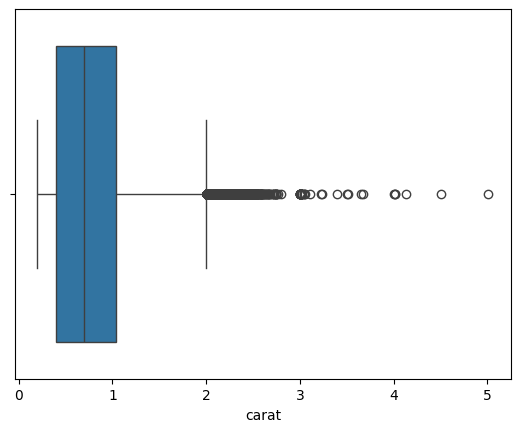

In [8]:
sns.boxplot(x=diamonds['carat'])

## 2. Fitur Table

<Axes: xlabel='table'>

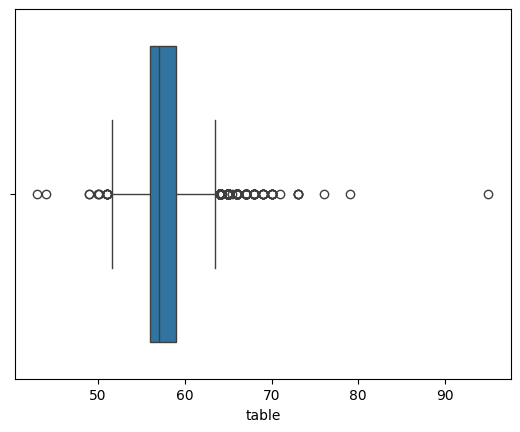

In [9]:
sns.boxplot(x=diamonds['table'])

## 3. Fitur X

<Axes: xlabel='x'>

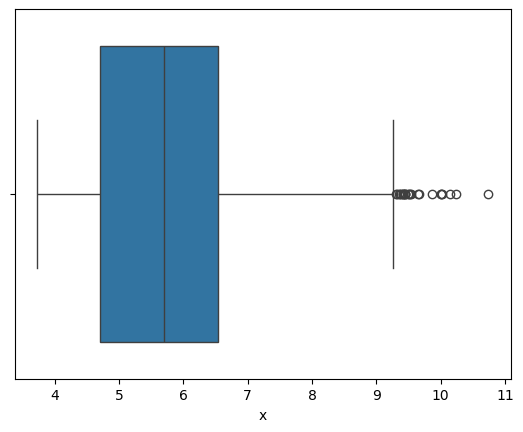

In [10]:
sns.boxplot(x=diamonds['x'])

Batas bawah = Q1 - 1.5 * IQR

Batas atas = Q3 + 1.5 * IQR


In [11]:
# Pilih hanya kolom numerik
diamonds_numeric = diamonds.select_dtypes(include=[np.number])

Q1 = diamonds_numeric.quantile(0.25)
Q3 = diamonds_numeric.quantile(0.75)
IQR = Q3 - Q1

# Filtering the original dataframe using the computed IQR
diamonds_filtered = diamonds[~((diamonds_numeric < (Q1 - 1.5 * IQR)) | (diamonds_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
diamonds_filtered.shape

(47524, 10)

### Univariate Analysis

Selanjutnya, kita akan melakukan proses analisis data dengan teknik Univariate EDA. Pertama, Anda bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.


In [12]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

## Categorical Features
### Fitur Cut

           jumlah sampel  persentase
cut                                 
Ideal              21548        40.0
Premium            13780        25.6
Very Good          12081        22.4
Good                4902         9.1
Fair                1609         3.0


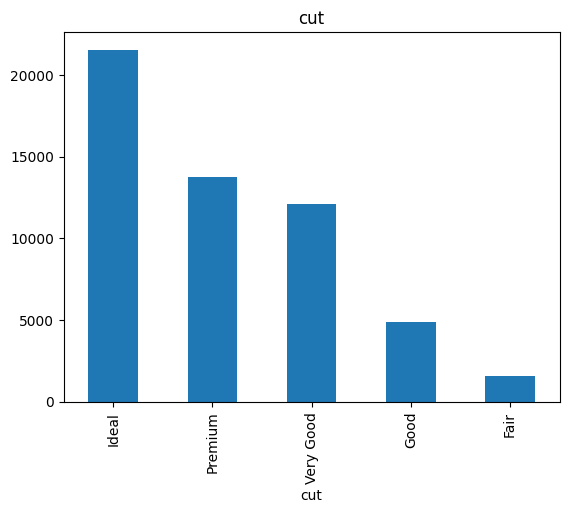

In [13]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Fitur Color

       jumlah sampel  persentase
color                           
G              11284        20.9
E               9797        18.2
F               9538        17.7
H               8298        15.4
D               6774        12.6
I               5421        10.1
J               2808         5.2


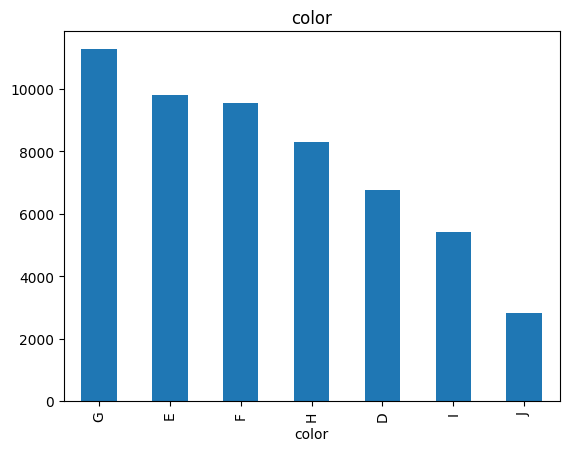

In [14]:
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

### Fitur Clarity

         jumlah sampel  persentase
clarity                           
SI1              13063        24.2
VS2              12254        22.7
SI2               9185        17.0
VS1               8170        15.2
VVS2              5066         9.4
VVS1              3654         6.8
IF                1790         3.3
I1                 738         1.4


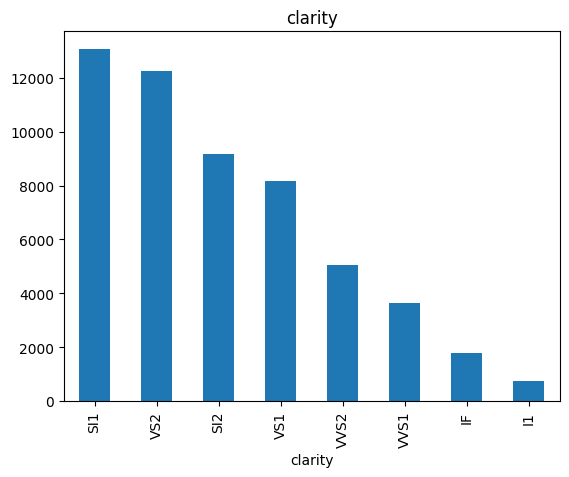

In [15]:
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

1. 'IF' - Internally Flawless 
2. 'VVS2' - Very Very Slight Inclusions 
3. 'VVS1' - Very Very Slight Inclusions 
4. 'VS1' - Very Slight Inclusions
5. 'VS2' - Very Slight Inclusions
6. 'SI2' - Slight Inclusions
7. 'SI1' - Slight Inclusions
8. 'I1' - Imperfect

## Numerical Features

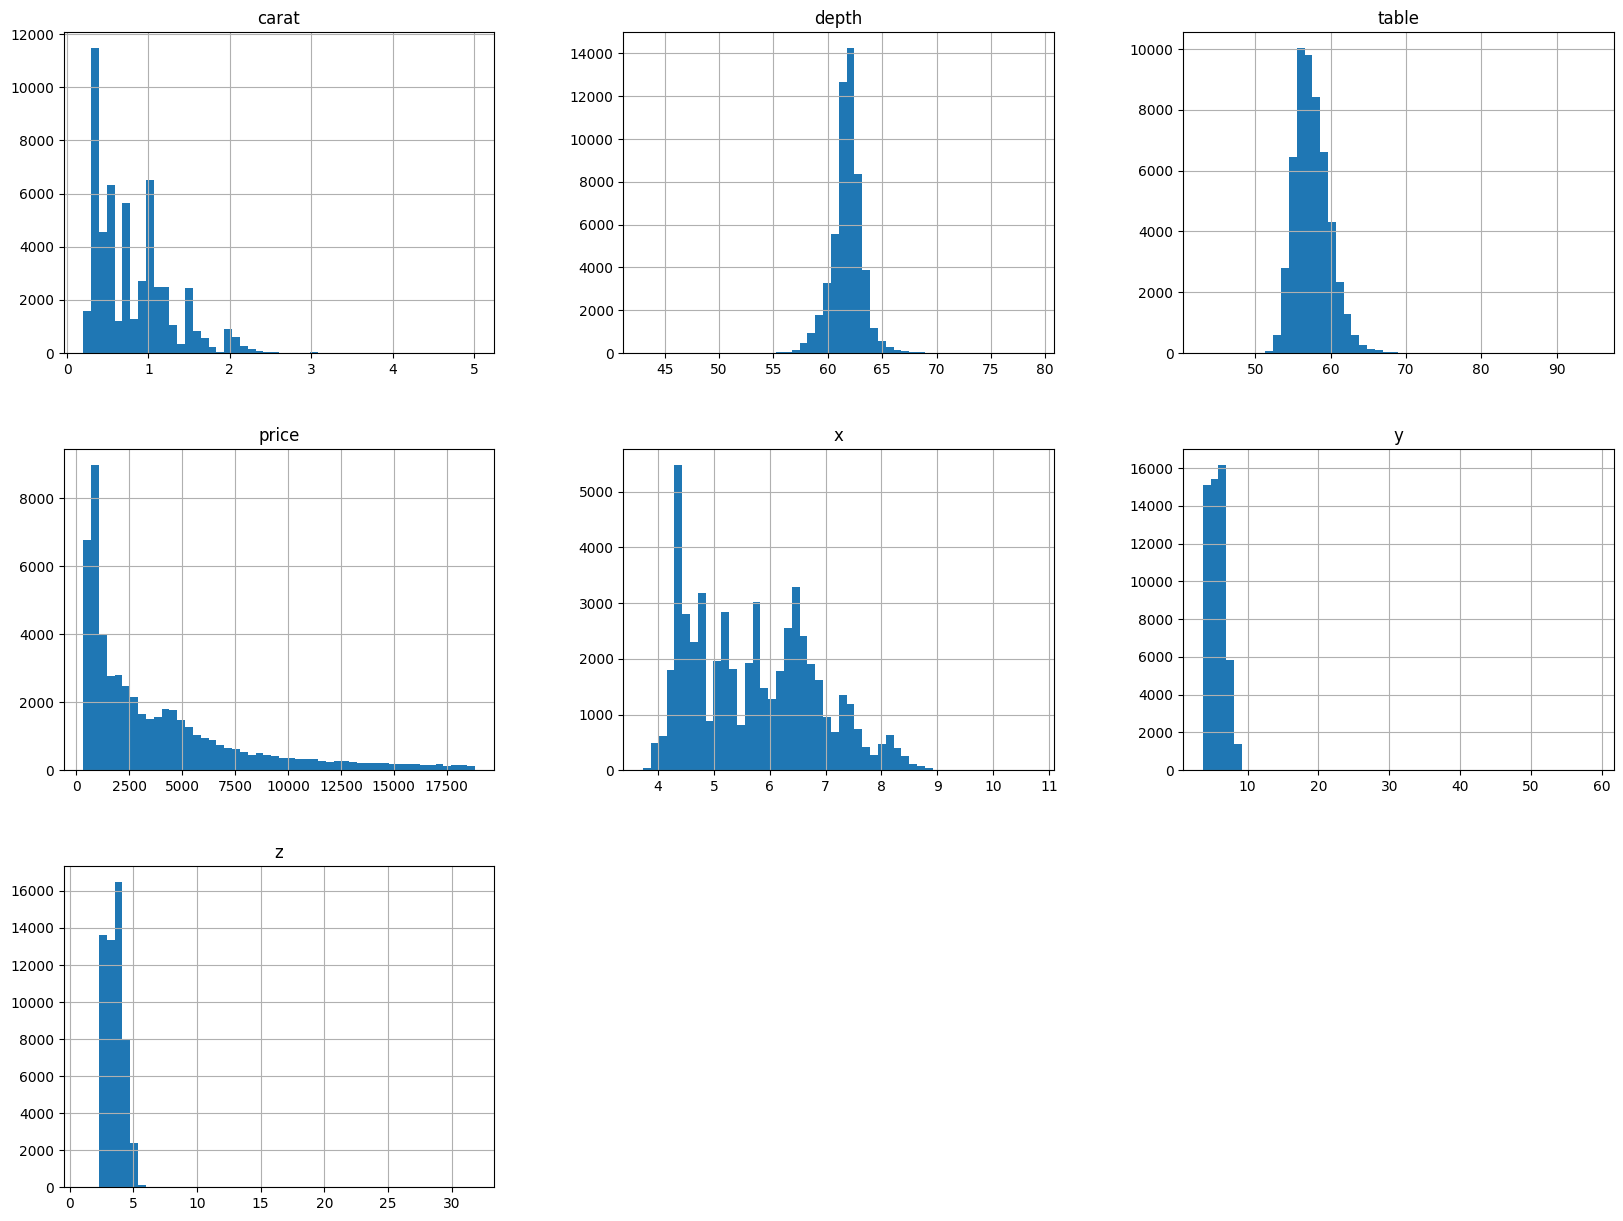

In [16]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

- Peningkatan harga diamonds sebanding dengan penurunan jumlah sampel. Hal ini dapat kita lihat jelas dari histogram "price" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu y).
- Rentang harga diamonds cukup tinggi yaitu dari skala ratusan dolar Amerika hingga sekitar $11800.
- Setengah harga berlian bernilai di bawah $2500.
- Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

## Categorical Features

C:\Users\kuhpr\AppData\Local\Temp\ipykernel_11936\956068473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
C:\Users\kuhpr\AppData\Local\Temp\ipykernel_11936\956068473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
C:\Users\kuhpr\AppData\Local\Temp\ipykernel_11936\956068473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="pri

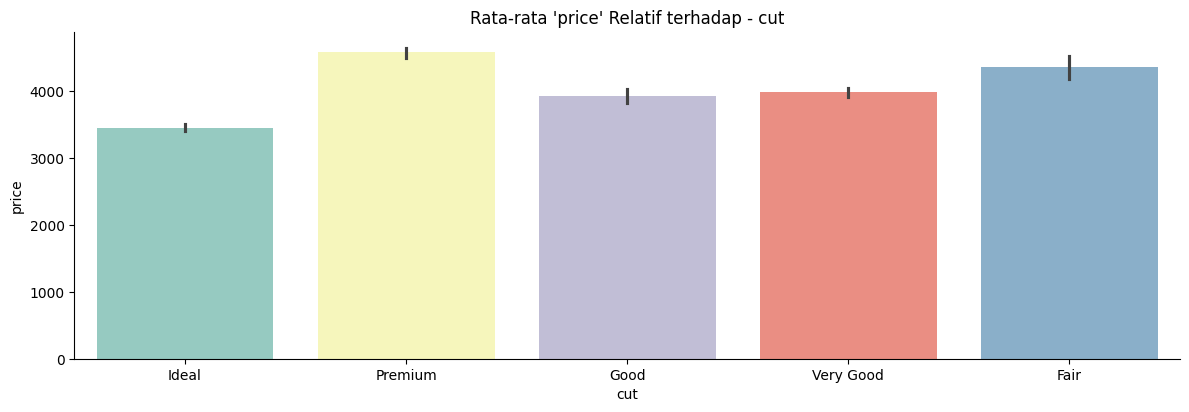

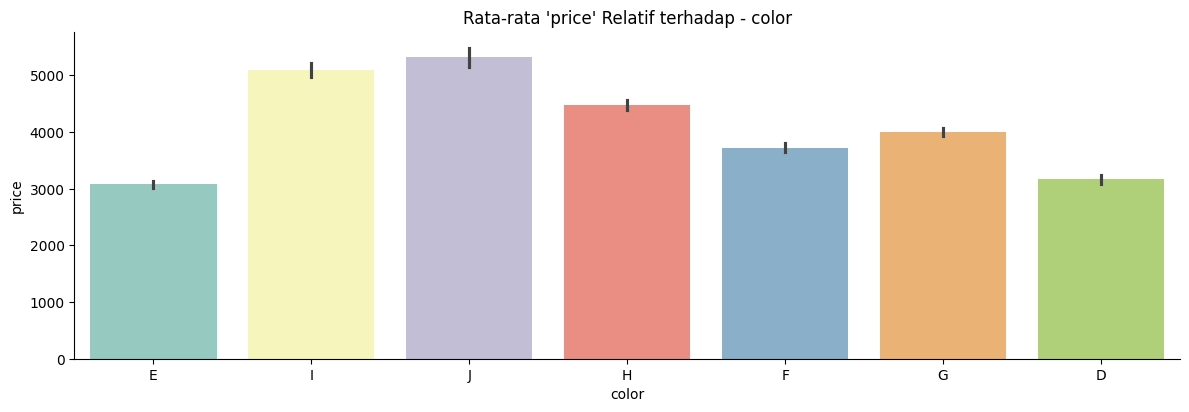

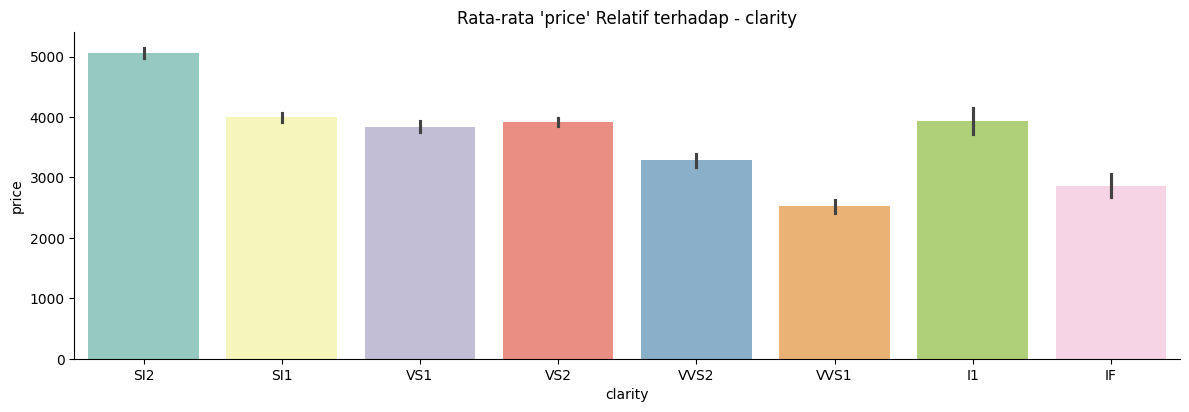

In [17]:
cat_features = diamonds.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

- Pada fitur ‘cut’, rata-rata harga cenderung mirip. Rentangnya berada antara 3500 hingga 4500. Grade tertinggi yaitu grade Ideal memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur cut memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.
- Pada fitur ‘color’, semakin rendah grade warna, harga diamonds justru semakin tinggi. Dari sini dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap harga.
- Pada fitur ‘clarity’, secara umum, diamond dengan grade lebih rendah memiliki harga yang lebih tinggi. Hal ini berarti bahwa fitur ‘clarity’ memiliki pengaruh yang rendah terhadap harga.
- Kesimpulan akhir, fitur kategori memiliki pengaruh yang rendah terhadap harga.


## Numerical Features

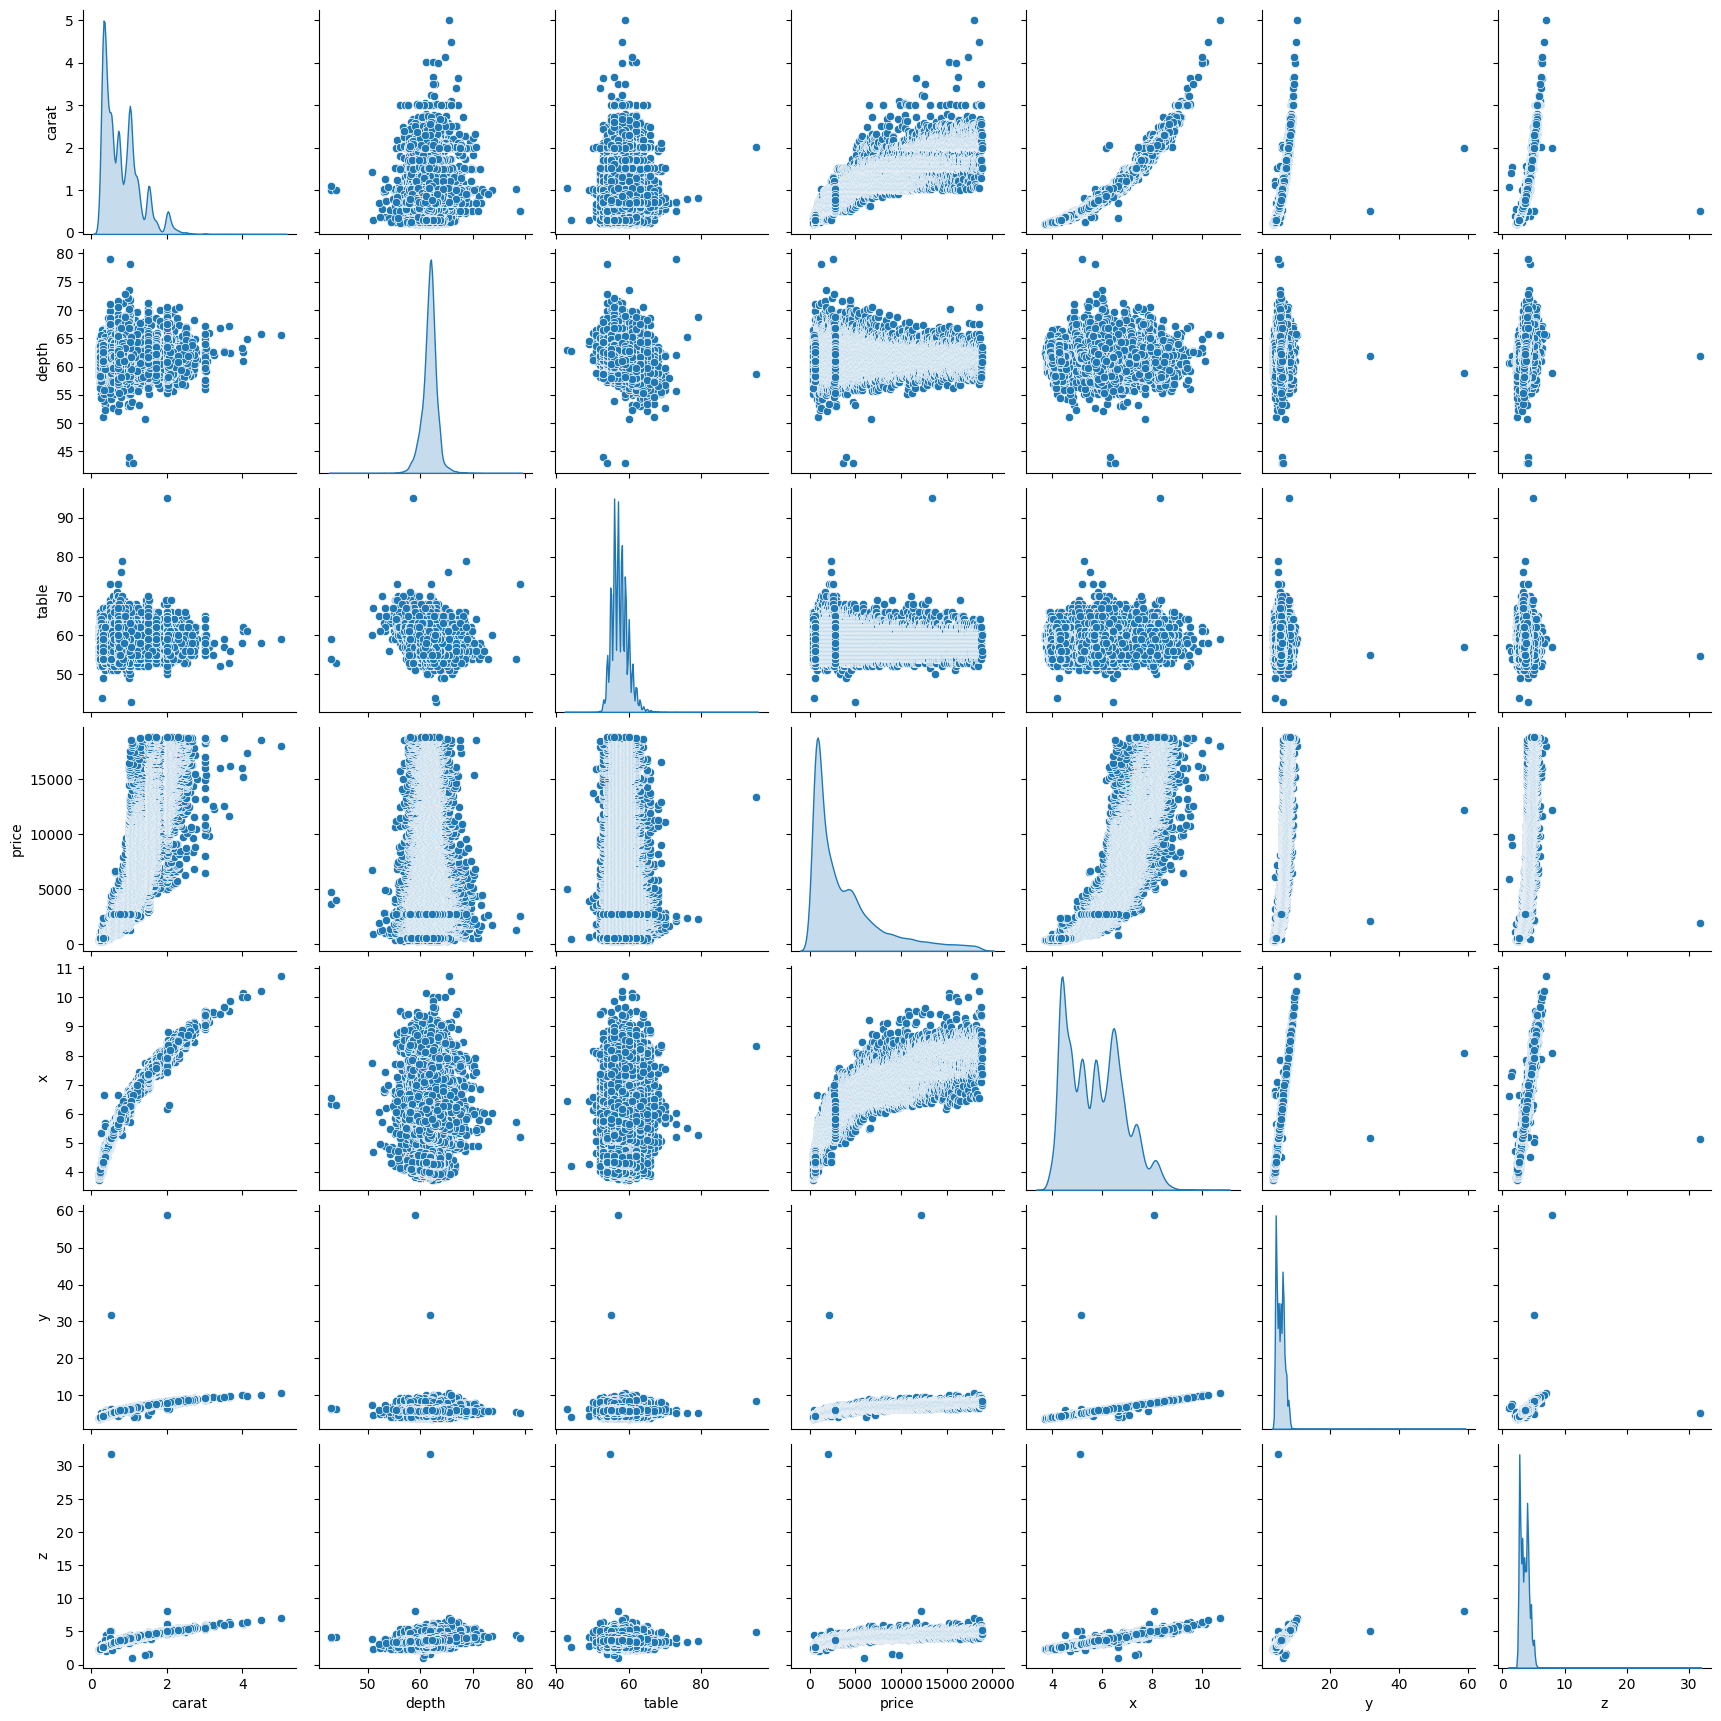

In [18]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(diamonds, diag_kind = 'kde')

Pada pola sebaran data grafik pairplot sebelumnya, terlihat ‘carat’, ‘x’, ‘y’, dan ‘z’ memiliki korelasi yang tinggi dengan fitur "price". Sedangkan kedua fitur lainnya yaitu 'depth' dan 'table' terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola. Untuk mengevaluasi skor korelasinya, gunakan fungsi corr().

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

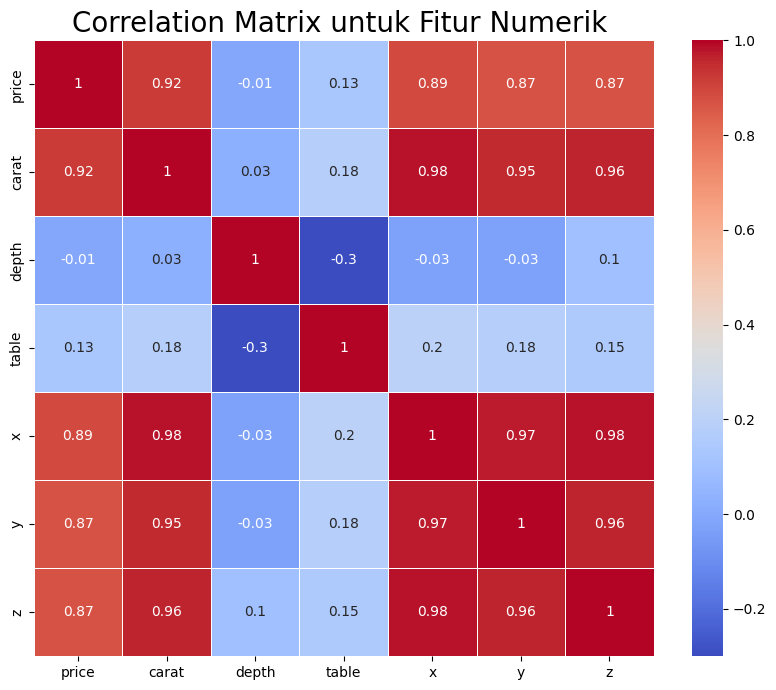

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds[numerical_features].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Nah, kembali pada grafik korelasi di atas. Jika kita amati, fitur ‘carat’, ‘x, ‘y’, dan ‘z’ memiliki skor korelasi yang besar (di atas 0.9) dengan fitur target ‘price’. Artinya, fitur 'price' berkorelasi tinggi dengan keempat fitur tersebut. Sementara itu, fitur ‘depth’ memiliki korelasi yang sangat kecil (0.01). Sehingga, fitur tersebut dapat di-drop.

In [20]:
diamonds.drop(['depth'], inplace=True, axis=1)
diamonds.head()

C:\Users\kuhpr\AppData\Local\Temp\ipykernel_11936\2222599575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds.drop(['depth'], inplace=True, axis=1)


,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


## Encoding Fitur Kategori

In [21]:
from sklearn.preprocessing import  OneHotEncoder
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity')],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,61.0,326,3.89,3.84,2.31,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,65.0,327,4.05,4.07,2.31,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,58.0,334,4.20,4.23,2.63,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0.31,58.0,335,4.34,4.35,2.75,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False


## Reduksi Dimensi dengan PCA

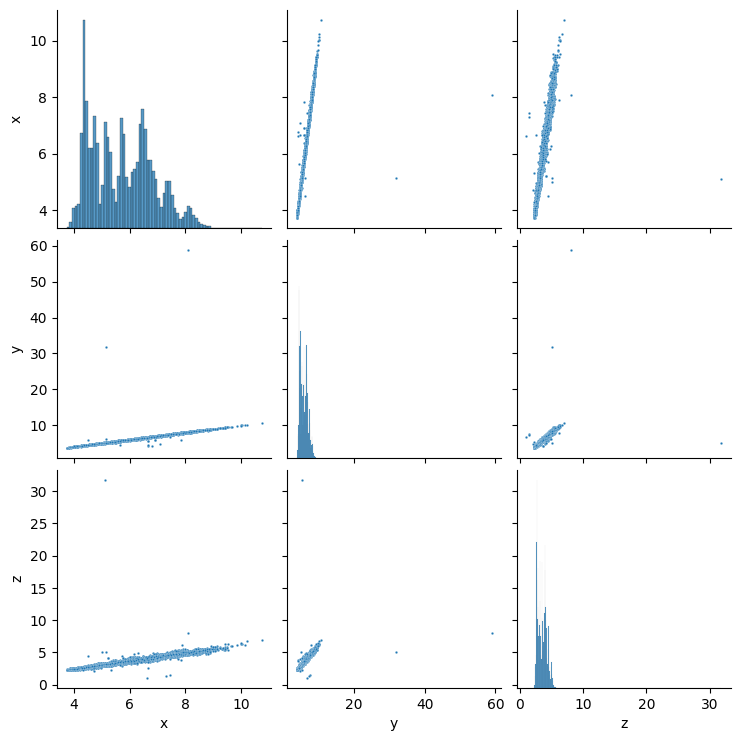

In [22]:
sns.pairplot(diamonds[['x','y','z']], plot_kws={"s": 3});

In [23]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['x','y','z']])
princ_comp = pca.transform(diamonds[['x','y','z']])

In [24]:
pca.explained_variance_ratio_.round(3)

array([0.982, 0.013, 0.005])

Sekarang Anda akan membuat fitur baru bernama 'dimension' untuk menggantikan fitur 'x', 'y', dan'z' . Oleh karena itu, mari jalankan kode di atas dengan beberapa perubahan berikut:

- Gunakan n_component = 1, karena kali ini, jumlah komponen kita hanya satu.
- Fit model dengan data masukan.
- Tambahkan fitur baru ke dataset dengan nama 'dimension' dan lakukan proses transformasi.
- Drop kolom ‘x’, ‘y’, dan ‘z’.

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)

In [26]:
from sklearn.model_selection import train_test_split
 
X = diamonds.drop(["price"],axis =1)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [27]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 53920
Total # of sample in train dataset: 48528
Total # of sample in test dataset: 5392


## Standarisasi

In [28]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
34240,-0.840062,0.241770,-0.906089
12480,0.233680,-1.552700,0.452972
16878,0.444217,-0.206848,0.618570
22014,1.475851,-0.206848,1.416372
25960,1.623228,-0.655465,1.530715


In [29]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,48528.0000,48528.0000,48528.0000
mean,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.2611,-6.4875,-1.8028
25%,-0.8401,-0.6555,-0.9028
50%,-0.2084,-0.2068,-0.0244
75%,0.5074,0.6904,0.7049
max,8.8657,9.6627,21.9570


kita akan membuat tiga buah model machine learning dangan algoritma berikut:

- K-Nearest Neighbor (KNN)
- Random Forest 
- Boosting Algorithm.

## Model Development dengan K-Nearest Neighbor

In [30]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Model Development dengan Random Forest

In [32]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

- n_estimator: jumlah trees (pohon) di forest. Di sini kita set - n_estimator=50.
- max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- random_state: digunakan untuk mengontrol random number generator yang digunakan. 
- n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

##  Model Development dengan Boosting Algorithm using Adaptive Boosting

In [33]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

- learning_rate: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting.
- random_state: digunakan untuk mengontrol random number generator yang digunakan.

## Evaluasi Model

In [34]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [35]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,462.824928,566.602185
RF,109.591201,301.12772
Boosting,1867.088768,1799.040057


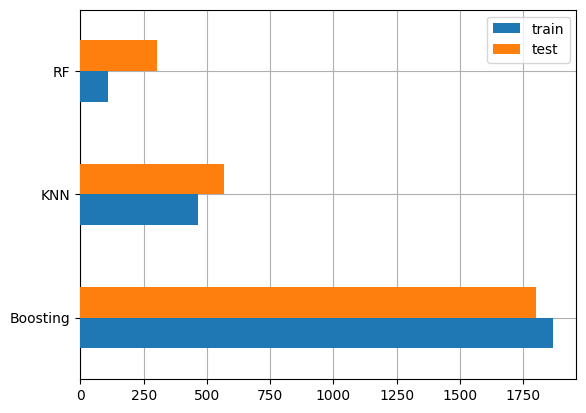

In [36]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Random Forest (RF) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar (berdasarkan grafik, angkanya di atas 800). Sehingga model RF yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga diamonds.

### Testing

In [37]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
47295,394,462.1,422.9,788.1
